Uploading Text file

In [0]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving contraction.py to contraction.py
Saving train.csv to train.csv


Loading Data into a dataframe

In [0]:
import io
import pandas as pd

In [0]:
df=pd.read_csv(io.BytesIO(uploaded['train.csv']))

Importing Dependencies

In [6]:
import numpy as np
import pandas as pd
import re
import nltk
from collections import Counter
from nltk import tokenize
from tqdm import tqdm
from nltk import word_tokenize
from bs4 import BeautifulSoup
from gensim.models import Word2Vec, Phrases
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, GRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization,concatenate
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from nltk.tokenize import WordPunctTokenizer
from string import punctuation, ascii_lowercase
from gensim.models import Word2Vec
from keras.layers import Lambda
from contraction import fix
from string import punctuation

Using TensorFlow backend.


## Data Preprocessing

In [0]:
df['question1']=df['question1'].astype('str')
df['question2']=df['question2'].astype('str')

In [0]:
df['question1'] = df['question1'].str.lower()
df['question2']= df['question2'].str.lower()

In [0]:
EMOTICONS = {u":‑\)":"Happy face or smiley",u":\)":"Happy face or smiley",u":-\]":"Happy face or smiley",u":\]":"Happy face or smiley",u":-3":"Happy face smiley",u":3":"Happy face smiley",u":->":"Happy face smiley",u":>":"Happy face smiley",u"8-\)":"Happy face smiley",u":o\)":"Happy face smiley",u":-\}":"Happy face smiley",u":\}":"Happy face smiley",u":-\)":"Happy face smiley",u":c\)":"Happy face smiley",u":\^\)":"Happy face smiley",u"=\]":"Happy face smiley",u"=\)":"Happy face smiley",u":‑D":"Laughing, big grin or laugh with glasses",u":D":"Laughing, big grin or laugh with glasses",u"8‑D":"Laughing, big grin or laugh with glasses",u"8D":"Laughing, big grin or laugh with glasses",u"X‑D":"Laughing, big grin or laugh with glasses",u"XD":"Laughing, big grin or laugh with glasses",u"=D":"Laughing, big grin or laugh with glasses",u"=3":"Laughing, big grin or laugh with glasses",u"B\^D":"Laughing, big grin or laugh with glasses",u":-\)\)":"Very happy",u":‑\(":"Frown, sad, andry or pouting",u":-\(":"Frown, sad, andry or pouting",u":\(":"Frown, sad, andry or pouting",u":‑c":"Frown, sad, andry or pouting",u":c":"Frown, sad, andry or pouting",u":‑<":"Frown, sad, andry or pouting",u":<":"Frown, sad, andry or pouting",u":‑\[":"Frown, sad, andry or pouting",u":\[":"Frown, sad, andry or pouting",u":-\|\|":"Frown, sad, andry or pouting",u">:\[":"Frown, sad, andry or pouting",u":\{":"Frown, sad, andry or pouting",u":@":"Frown, sad, andry or pouting",u">:\(":"Frown, sad, andry or pouting",u":'‑\(":"Crying",u":'\(":"Crying",u":'‑\)":"Tears of happiness",u":'\)":"Tears of happiness",u"D‑':":"Horror",u"D:<":"Disgust",u"D:":"Sadness",u"D8":"Great dismay",u"D;":"Great dismay",u"D=":"Great dismay",u"DX":"Great dismay",u":‑O":"Surprise",u":O":"Surprise",u":‑o":"Surprise",u":o":"Surprise",u":-0":"Shock",u"8‑0":"Yawn",u">:O":"Yawn",u":-\*":"Kiss",u":\*":"Kiss",u":X":"Kiss",u";‑\)":"Wink or smirk",u";\)":"Wink or smirk",u"\*-\)":"Wink or smirk",u"\*\)":"Wink or smirk",u";‑\]":"Wink or smirk",u";\]":"Wink or smirk",u";\^\)":"Wink or smirk",u":‑,":"Wink or smirk",u";D":"Wink or smirk",u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",u":‑\|":"Straight face",u":\|":"Straight face",u":$":"Embarrassed or blushing",u":‑x":"Sealed lips or wearing braces or tongue-tied",u":x":"Sealed lips or wearing braces or tongue-tied",u":‑#":"Sealed lips or wearing braces or tongue-tied",u":#":"Sealed lips or wearing braces or tongue-tied",u":‑&":"Sealed lips or wearing braces or tongue-tied",u":&":"Sealed lips or wearing braces or tongue-tied",u"O:‑\)":"Angel, saint or innocent",u"O:\)":"Angel, saint or innocent",u"0:‑3":"Angel, saint or innocent",u"0:3":"Angel, saint or innocent",u"0:‑\)":"Angel, saint or innocent",u"0:\)":"Angel, saint or innocent",u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",u"0;\^\)":"Angel, saint or innocent",u">:‑\)":"Evil or devilish",u">:\)":"Evil or devilish",u"\}:‑\)":"Evil or devilish",u"\}:\)":"Evil or devilish",u"3:‑\)":"Evil or devilish",u"3:\)":"Evil or devilish",u">;\)":"Evil or devilish",u"\|;‑\)":"Cool",u"\|‑O":"Bored",u":‑J":"Tongue-in-cheek",u"#‑\)":"Party all night",u"%‑\)":"Drunk or confused",u"%\)":"Drunk or confused",u":-###..":"Being sick",u":###..":"Being sick",u"<:‑\|":"Dump",u"\(>_<\)":"Troubled",u"\(>_<\)>":"Troubled",u"\(';'\)":"Baby",u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",u"\(-_-\)zzz":"Sleeping",u"\(\^_-\)":"Wink",u"\(\(\+_\+\)\)":"Confused",u"\(\+o\+\)":"Confused",u"\(o\|o\)":"Ultraman",u"\^_\^":"Joyful",u"\(\^_\^\)/":"Joyful",u"\(\^O\^\)／":"Joyful",u"\(\^o\^\)／":"Joyful",u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",u"\('_'\)":"Sad or Crying",u"\(/_;\)":"Sad or Crying",u"\(T_T\) \(;_;\)":"Sad or Crying",u"\(;_;":"Sad of Crying",u"\(;_:\)":"Sad or Crying",u"\(;O;\)":"Sad or Crying",u"\(:_;\)":"Sad or Crying",u"\(ToT\)":"Sad or Crying",u";_;":"Sad or Crying",u";-;":"Sad or Crying",u";n;":"Sad or Crying",u";;":"Sad or Crying",u"Q\.Q":"Sad or Crying",u"T\.T":"Sad or Crying",u"QQ":"Sad or Crying",u"Q_Q":"Sad or Crying",u"\(-\.-\)":"Shame",u"\(-_-\)":"Shame",u"\(一一\)":"Shame",u"\(；一_一\)":"Shame",u"\(=_=\)":"Tired",u"\(=\^\·\^=\)":"cat",u"\(=\^\·\·\^=\)":"cat",u"=_\^=	":"cat",u"\(\.\.\)":"Looking down",u"\(\._\.\)":"Looking down",u"\^m\^":"Giggling with hand covering mouth",u"\(\・\・?":"Confusion",u"\(?_?\)":"Confusion",u">\^_\^<":"Normal Laugh",u"<\^!\^>":"Normal Laugh",u"\^/\^":"Normal Laugh",u"\（\*\^_\^\*）" :"Normal Laugh",u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",u"\(^\^\)":"Normal Laugh",u"\(\^\.\^\)":"Normal Laugh",u"\(\^_\^\.\)":"Normal Laugh",u"\(\^_\^\)":"Normal Laugh",u"\(\^\^\)":"Normal Laugh",u"\(\^J\^\)":"Normal Laugh",u"\(\*\^\.\^\*\)":"Normal Laugh",u"\(\^—\^\）":"Normal Laugh",u"\(#\^\.\^#\)":"Normal Laugh",u"\（\^—\^\）":"Waving",u"\(;_;\)/~~~":"Waving",u"\(\^\.\^\)/~~~":"Waving",u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",u"\(T_T\)/~~~":"Waving",u"\(ToT\)/~~~":"Waving",u"\(\*\^0\^\*\)":"Excited",u"\(\*_\*\)":"Amazed",u"\(\*_\*;":"Amazed",u"\(\+_\+\) \(@_@\)":"Amazed",u"\(\*\^\^\)v":"Laughing,Cheerful",u"\(\^_\^\)v":"Laughing,Cheerful",u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",u'\(-"-\)':"Worried",u"\(ーー;\)":"Worried",u"\(\^0_0\^\)":"Eyeglasses",u"\(\＾ｖ\＾\)":"Happy",u"\(\＾ｕ\＾\)":"Happy",u"\(\^\)o\(\^\)":"Happy",u"\(\^O\^\)":"Happy",u"\(\^o\^\)":"Happy",u"\)\^o\^\(":"Happy",u":O o_O":"Surprised",u"o_0":"Surprised",u"o\.O":"Surpised",u"\(o\.o\)":"Surprised",u"oO":"Surprised",u"\(\*￣m￣\)":"Dissatisfied",u"\(‘A`\)":"Snubbed or Deflated"}

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lmtzr = WordNetLemmatizer()
stop_word = ["above" ,"below", "up", "down", "over", "all", "few", "most", "no", "not", "too", "very", "won", "again", "nor"]
customStopWords=[]
for x in stopwords.words('english'):
     if x not in stop_word:
            customStopWords.append(x)
customStopWords = set(customStopWords+['hmm','hmmm','hmmmm','hmmmmm','hmmmmmm','hmmmmmmm','hmmmmmmmm','...'])

In [0]:
mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

In [0]:
# Removing html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing Digits
def remove_digits(text): 
    pattern = '[0-9]'
    text = re.sub(pattern, '', text) 
    return text

# Removing brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Expanding words and slangs
def replace_contractions(text):
    """Replace contractions in string of text"""
    return fix(text)

# Removing punctuation
PUNCT_TO_REMOVE = punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"   
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing Emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

# Removing stopwords and doing lemmatization
def remove_stop_word(text):
    word_sent = word_tokenize(text)
    text = [lmtzr.lemmatize(word) for word in word_sent if word not in customStopWords]
    return text

def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

def normalize(text):
    text = strip_html(text)
    text = remove_digits(text)
    text = replace_typical_misspell(text)
    text = remove_between_square_brackets(text)
    text = replace_contractions(text)
    text = remove_emoji(text)
    text = remove_emoticons(text)
    text = remove_punctuation(text)
    text = remove_stop_word(text)
    return text

In [14]:
df['question1'] = df['question1'].apply(lambda x: normalize(x))
df['question2']= df['question2'].apply(lambda x: normalize(x))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


# Creating word embeddings

In [0]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 10
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

In [0]:
w2v_model = Word2Vec(size=W2V_SIZE, window=W2V_WINDOW, min_count=W2V_MIN_COUNT, workers=8)

In [0]:
q1 = list(df.question1.values)
q2 = list(df.question2.values)
doc=q1+q2

In [0]:
w2v_model.build_vocab(doc)

In [19]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 17005


In [20]:
w2v_model.train(doc, total_examples=len(doc), epochs=W2V_EPOCH)

(116977238, 127928320)

In [0]:
# 20% validation data (Split the data in to train and validation as you see fit (recommended is 80/20 split))
train_df, val_df = train_test_split(df, test_size=0.2, random_state=1234)

In [22]:
## some config values 
embed_size = 300 # how big is each word vector
max_features = 200000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 80 # max number of words in a question to usetokenizer = Tokenizer(num_words=max_features)

train_X1 = train_df['question1'].values
train_X2 = train_df['question2'].values
val_X1 = val_df['question1'].values
val_X2 = val_df['question2'].values

dfq1=df['question1'].values
dfq2=df['question2'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(dfq1+dfq2))
train_X1 = tokenizer.texts_to_sequences(train_X1)
train_X2 = tokenizer.texts_to_sequences(train_X2)

val_X1 = tokenizer.texts_to_sequences(val_X1)
val_X2 = tokenizer.texts_to_sequences(val_X2)

print('Number of unique words',len(tokenizer.word_index))
## Pad the sentences 
train_X1 = pad_sequences(train_X1, maxlen=maxlen)
train_X2 = pad_sequences(train_X2, maxlen=maxlen)
val_X1 = pad_sequences(val_X1, maxlen=maxlen)
val_X2 = pad_sequences(val_X2, maxlen=maxlen)

## Get the target values
train_y = train_df['is_duplicate'].values
val_y = val_df['is_duplicate'].values

Number of unique words 86094


In [23]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(86095, 300)


In [24]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=maxlen, trainable=False)

# Model Building

In [0]:
def exponent_neg_manhattan_distance(left, right):
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

In [0]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [35]:
# Define inputs
seq1 = Input(shape=(maxlen,), dtype='int32')
seq2 = Input(shape=(maxlen,), dtype='int32')

# Run inputs through embedding
emb1 = embedding_layer(seq1)
emb2 = embedding_layer(seq2)


lstm1=Bidirectional(CuDNNLSTM(1024, return_sequences=True))(emb1)
lstm1=Bidirectional(CuDNNLSTM(512, return_sequences=True))(lstm1)
lstm1 = Attention(maxlen)(lstm1) 

lstm2=Bidirectional(CuDNNLSTM(1024, return_sequences=True))(emb2)
lstm2=Bidirectional(CuDNNLSTM(512, return_sequences=True))(lstm2)
lstm2 = Attention(maxlen)(lstm2) 

out_malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (x[0][0], 1))(([lstm1, lstm2]))

model = Model(inputs=[seq1, seq2], outputs=out_malstm_distance)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 80)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 80)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 80, 300)      25828500    input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 80, 2048)     10862592    embedding_1[4][0]          

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
early_stopping = EarlyStopping(monitor='val_acc', mode = 'max',patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('man_lstm',monitor='val_acc', 
                                   mode = 'max', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode = 'max',factor=0.5, patience=5, min_lr=0.0001, verbose=1)

In [38]:
history=model.fit([train_X1, train_X2], train_y,batch_size=64,epochs=10,shuffle=True,verbose=2,validation_data=([val_X1, val_X2], val_y),callbacks=[ model_checkpoint,reduce_lr,early_stopping])

Train on 291088 samples, validate on 72773 samples
Epoch 1/10
 - 1466s - loss: 0.5608 - acc: 0.7194 - val_loss: 0.4958 - val_acc: 0.7564

Epoch 00001: val_acc improved from -inf to 0.75639, saving model to man_lstm
Epoch 2/10
 - 1465s - loss: 0.4584 - acc: 0.7784 - val_loss: 0.4537 - val_acc: 0.7818

Epoch 00002: val_acc improved from 0.75639 to 0.78184, saving model to man_lstm
Epoch 3/10
 - 1464s - loss: 0.4027 - acc: 0.8127 - val_loss: 0.4369 - val_acc: 0.7936

Epoch 00003: val_acc improved from 0.78184 to 0.79356, saving model to man_lstm
Epoch 4/10
 - 1463s - loss: 0.3470 - acc: 0.8455 - val_loss: 0.4349 - val_acc: 0.7998

Epoch 00004: val_acc improved from 0.79356 to 0.79984, saving model to man_lstm
Epoch 5/10
 - 1465s - loss: 0.2946 - acc: 0.8750 - val_loss: 0.4502 - val_acc: 0.8005

Epoch 00005: val_acc improved from 0.79984 to 0.80049, saving model to man_lstm
Epoch 6/10
 - 1466s - loss: 0.2527 - acc: 0.8989 - val_loss: 0.4905 - val_acc: 0.7985

Epoch 00006: val_acc did not i

Plotting accuracy curve and loss curve for training and validation dataset


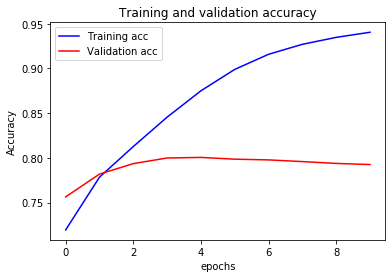

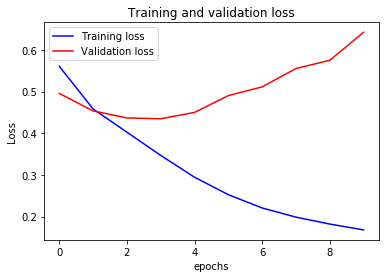

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Saving Models for deployment

In [47]:
model.save("model.h5")
w2v_model.save("w2vmodel.w2v")
from sklearn.externals import joblib
filename = 'tokenizer.pkl'
joblib.dump(tokenizer, filename)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


['tokenizer.pkl']